In [1]:
import os
import sys
directory_path = os.path.abspath(os.path.join('..'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
os.chdir(directory_path)
# Only for final delivery
import warnings
warnings.filterwarnings('ignore')
# libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="white")
# Libraries models
import pandas as pd
import numpy as np
from collections import Counter
from time import time
# Set some Pandas options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline') 
get_ipython().magic(u"config InlineBackend.figure_format='retina'")
# Import the necessary module's
from scipy.stats import chi2
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# library to save the models
import joblib
# import home made function
from utils import get_na, plot_pie,traine, test

In [2]:
path = os.getcwd() + '/data/interim/model_data_train_ohe_oversample_outlier.csv' 
X_train = pd.read_csv(path, sep=',')
path = os.getcwd() + '/data/interim/model_data_test_ohe_oversample_outlier.csv' 
X_test = pd.read_csv(path, sep=',')
path = os.getcwd() + '/data/interim/y_train_ohe_oversample_outlier.csv' 
y_train = pd.read_csv(path, sep=',')
path = os.getcwd() + '/data/interim/y_test_ohe_oversample_outlier.csv' 
y_test = pd.read_csv(path, sep=',')['atraso_15']

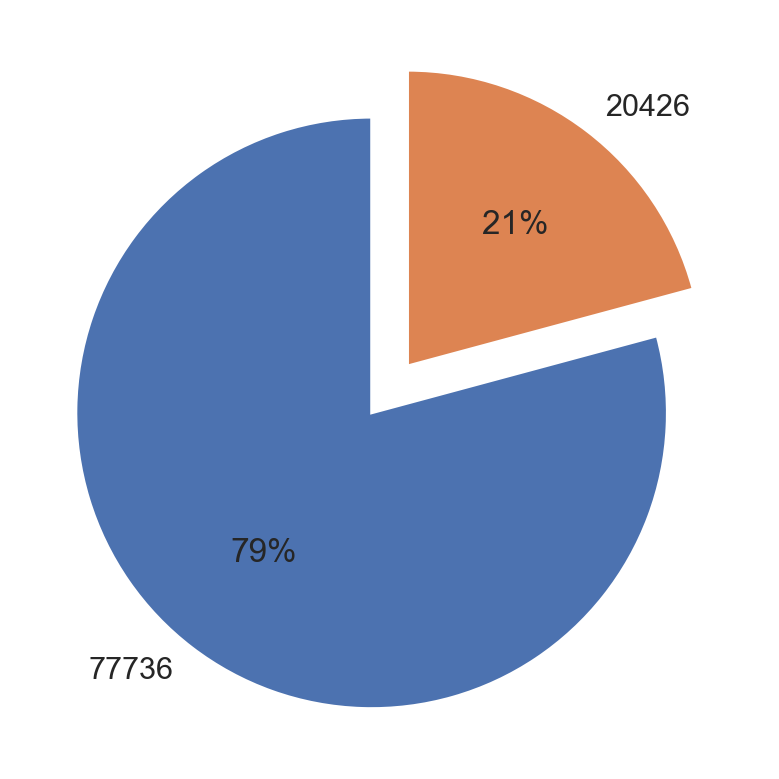

In [3]:
#define data
data = [X_train.shape[0],X_test.shape[0] ]
labels = [data[0], data[1]]
#create pie chart
plt.pie(data, labels = labels,startangle=90, 
        autopct='%1.f%%',explode=(0.1,0.1))
plt.show()

Información del dataset:
 las clases del target son: Counter({0: 38868, 1: 38868})


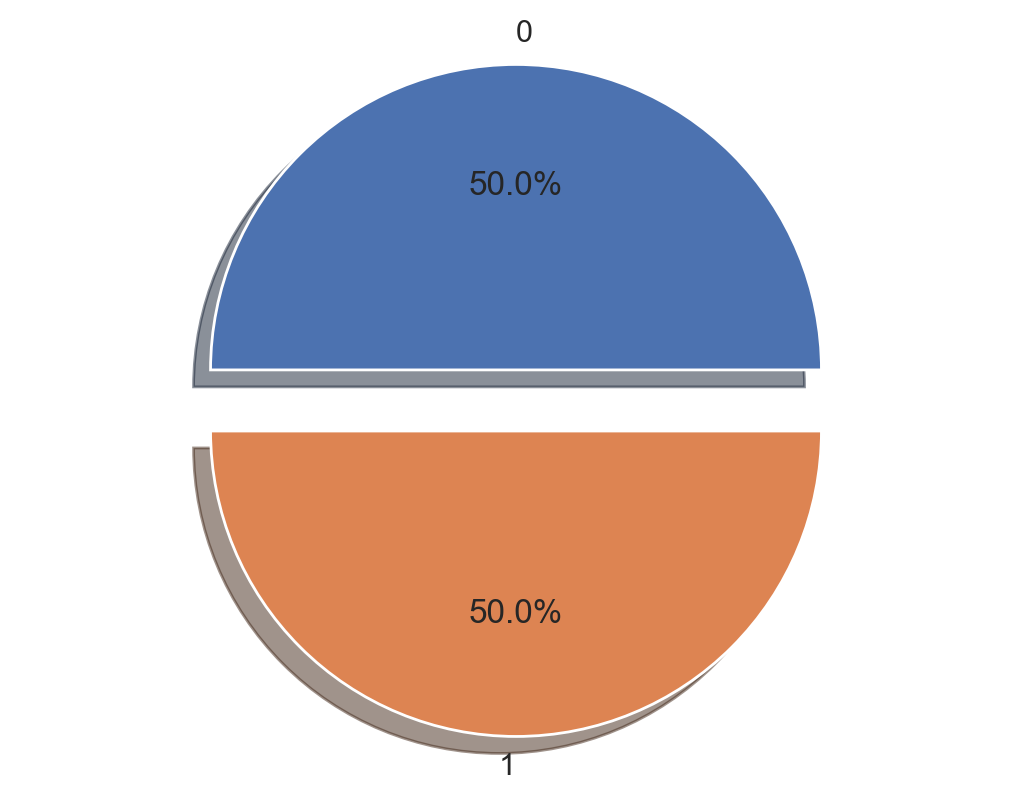

In [4]:
print('Información del dataset:'
      '\n las clases del target son: {}'.format(Counter(y_train.atraso_15)))
plot_pie(y_train.atraso_15)

In [5]:
clf = ComplementNB(alpha=0.1,class_prior = [0.815,0.185] )
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test.atraso_15, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.6574362319228781
EL ROC AUC Score es: 0.6906338429741428
              precision    recall  f1-score   support

           0       0.88      0.67      0.76     16658
           1       0.29      0.61      0.40      3768

    accuracy                           0.66     20426
   macro avg       0.59      0.64      0.58     20426
weighted avg       0.78      0.66      0.69     20426



Predicted class,False,True,All
Actual class,,,
0,11083,5575,16658
1,1454,2314,3768
All,12537,7889,20426


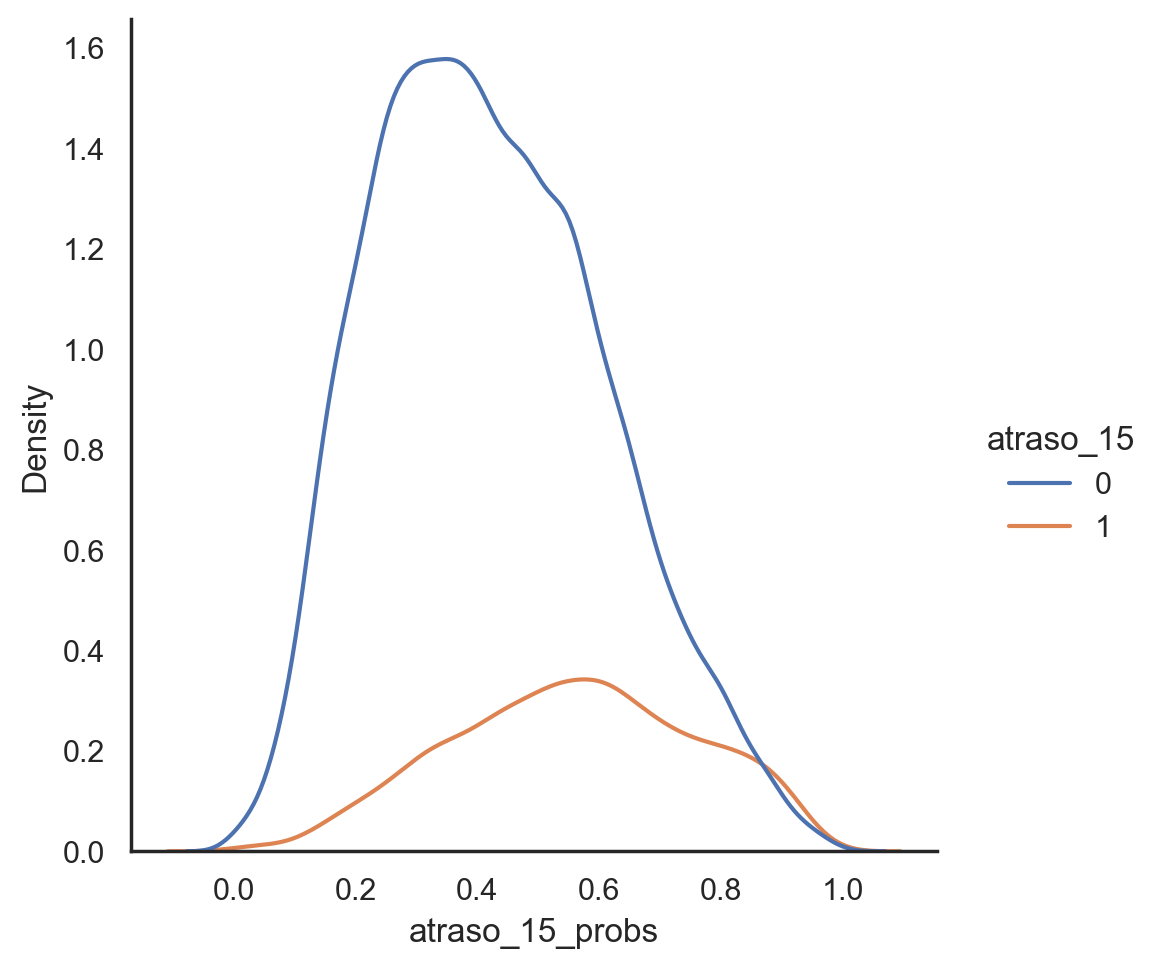

In [6]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [7]:
clf = DecisionTreeClassifier(random_state=0, max_features='sqrt',criterion='gini',
                             min_samples_split=0.001)
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test.atraso_15, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.701929554764544
EL ROC AUC Score es: 0.6474350340521019
              precision    recall  f1-score   support

           0       0.87      0.66      0.75     16658
           1       0.27      0.55      0.36      3768

    accuracy                           0.64     20426
   macro avg       0.57      0.61      0.56     20426
weighted avg       0.76      0.64      0.68     20426



Predicted class,False,True,All
Actual class,,,
0,11070,5588,16658
1,1683,2085,3768
All,12753,7673,20426


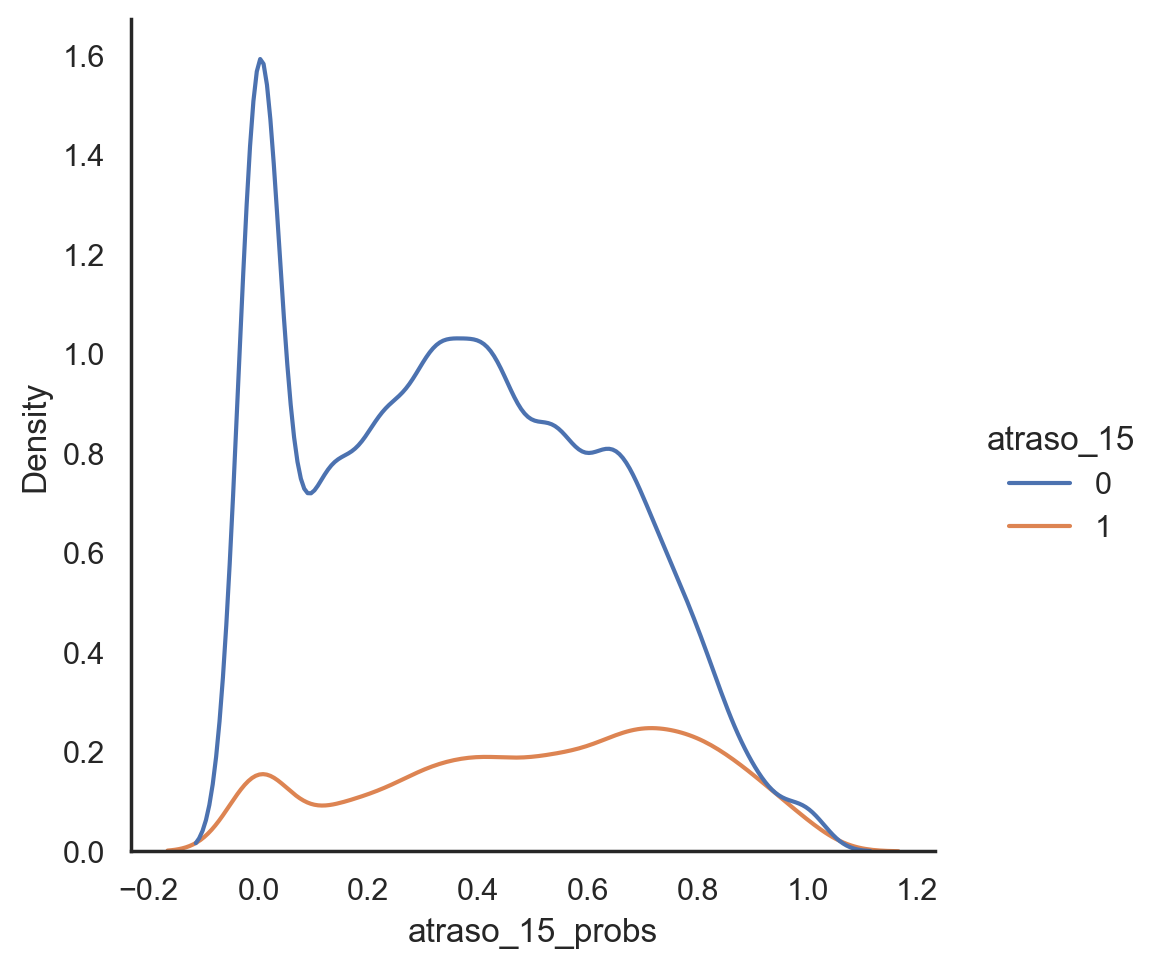

In [8]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [9]:
clf = LogisticRegression()
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test.atraso_15, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.6604159347733111
EL ROC AUC Score es: 0.6962687476468656
              precision    recall  f1-score   support

           0       0.88      0.68      0.77     16658
           1       0.30      0.61      0.40      3768

    accuracy                           0.66     20426
   macro avg       0.59      0.64      0.58     20426
weighted avg       0.78      0.66      0.70     20426



Predicted class,False,True,All
Actual class,,,
0,11264,5394,16658
1,1476,2292,3768
All,12740,7686,20426


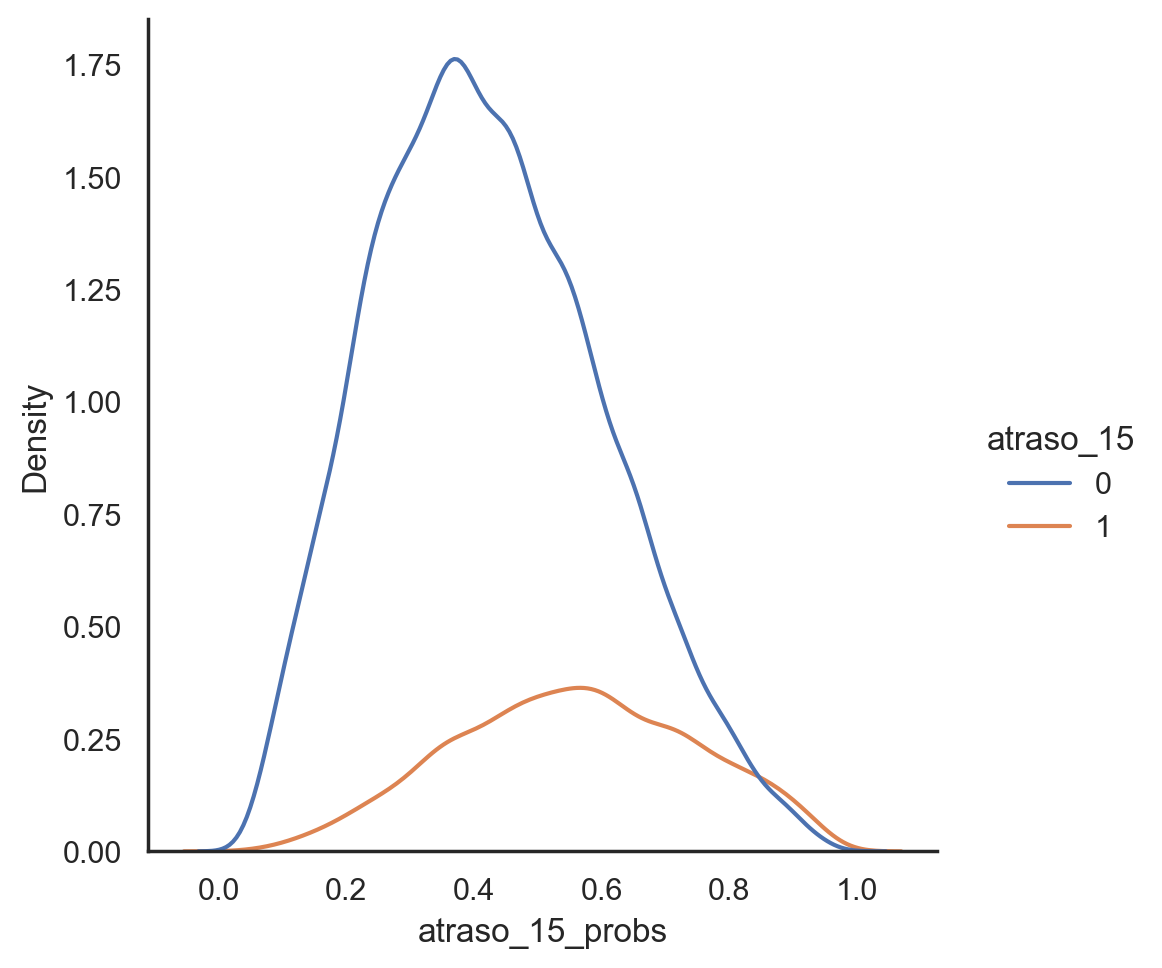

In [10]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [11]:
clf = RandomForestClassifier(n_estimators=500,random_state=0,warm_start=True,criterion='gini',
                             bootstrap=True,max_features='sqrt')
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test.atraso_15, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.9246148152997937
EL ROC AUC Score es: 0.6901490128369936
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     16658
           1       0.35      0.29      0.32      3768

    accuracy                           0.77     20426
   macro avg       0.60      0.58      0.59     20426
weighted avg       0.75      0.77      0.76     20426



Predicted class,False,True,All
Actual class,,,
0,14702,1956,16658
1,2694,1074,3768
All,17396,3030,20426


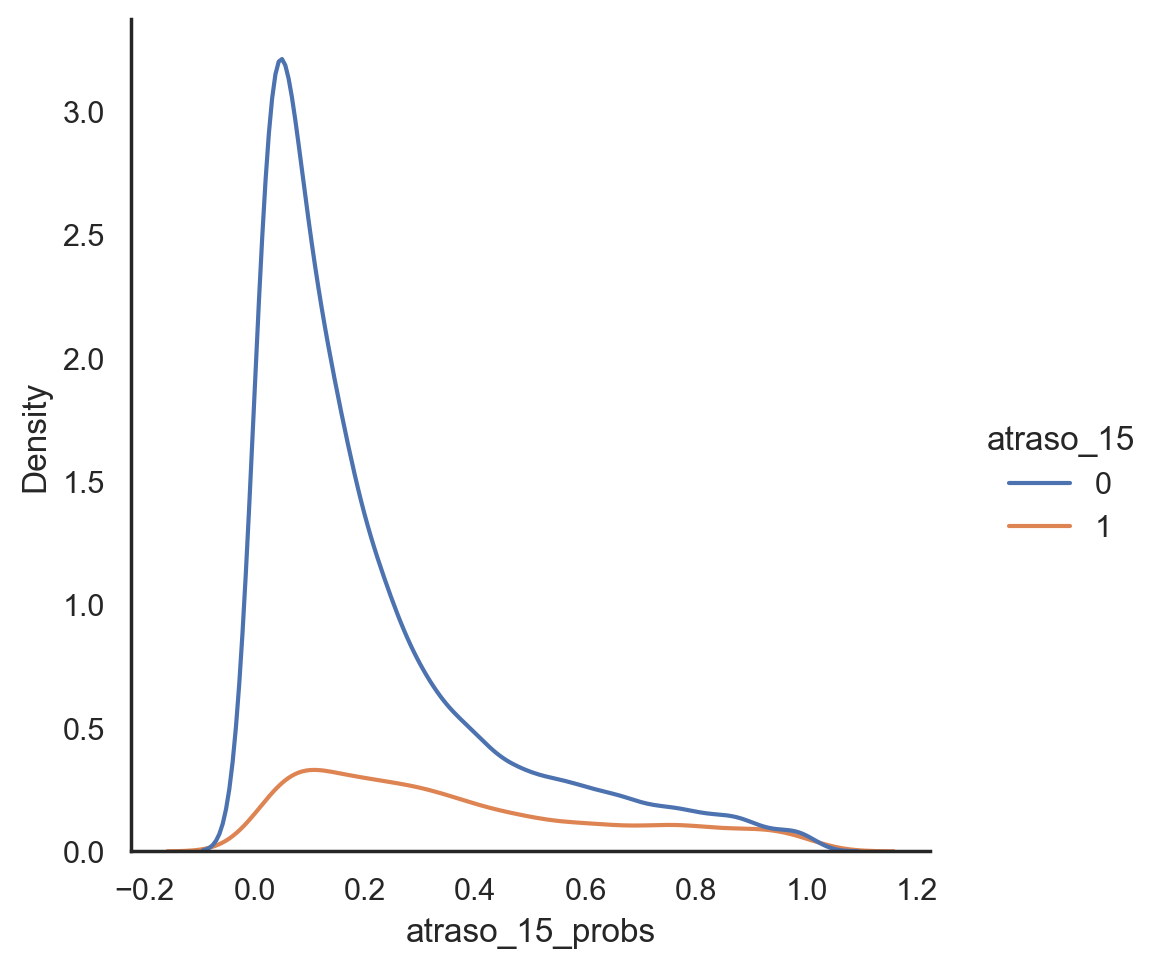

In [12]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [13]:
clf = XGBClassifier(random_state=0,verbosity = 0)
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test.atraso_15, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.7025212288738761
EL ROC AUC Score es: 0.7068101447784695
              precision    recall  f1-score   support

           0       0.89      0.69      0.78     16658
           1       0.31      0.60      0.41      3768

    accuracy                           0.68     20426
   macro avg       0.60      0.65      0.59     20426
weighted avg       0.78      0.68      0.71     20426



Predicted class,False,True,All
Actual class,,,
0,11549,5109,16658
1,1496,2272,3768
All,13045,7381,20426


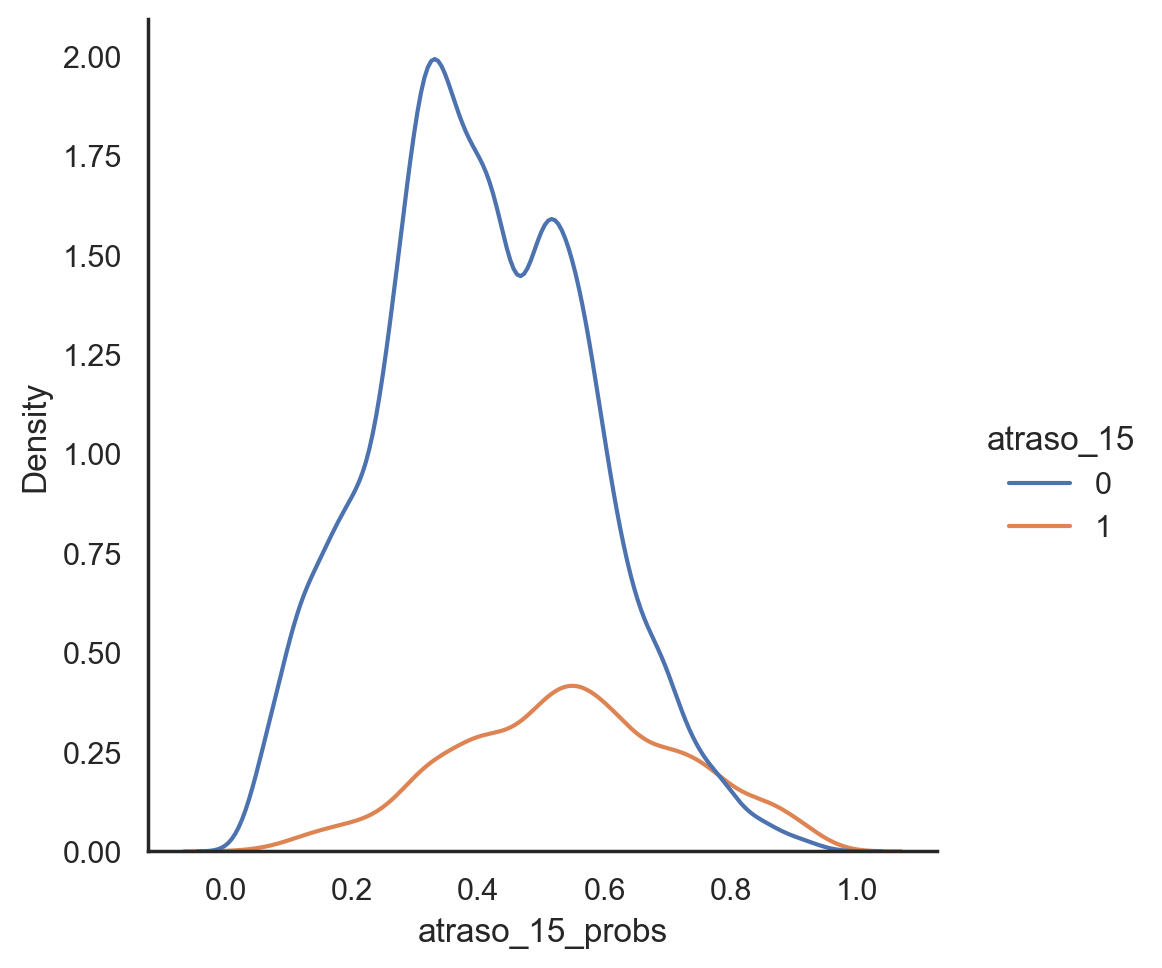

In [14]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [15]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test.atraso_15, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.8067793202207494
EL ROC AUC Score es: 0.6398618205033496
              precision    recall  f1-score   support

           0       0.86      0.72      0.78     16658
           1       0.27      0.46      0.34      3768

    accuracy                           0.67     20426
   macro avg       0.57      0.59      0.56     20426
weighted avg       0.75      0.67      0.70     20426



Predicted class,False,True,All
Actual class,,,
0,12034,4624,16658
1,2020,1748,3768
All,14054,6372,20426


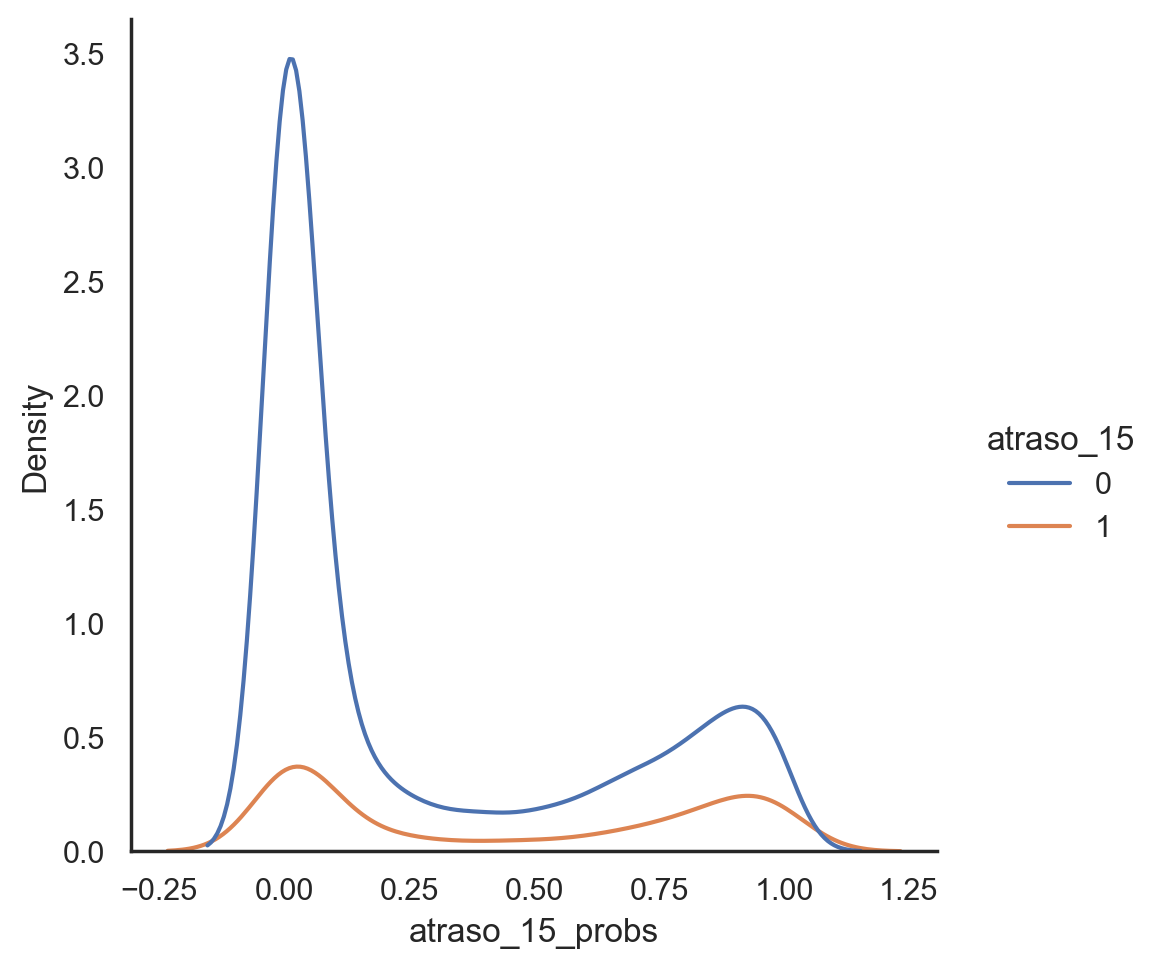

In [16]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");